In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

# Maciej Czarkowski 292810

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W rozdziale tym skupimy się na następujących klasyfikacji SVM


Na końcu zaprezentowane zostaną metody łączenia wyników różnych klasyfikatorów (tzw. ensemblingu), w celu poprawy jakości klasyfikacji.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

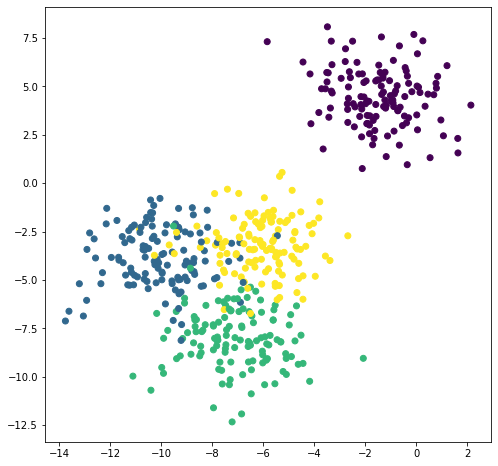

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### 2.4 SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, jest są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder nieliniowych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder nieliniowych, uważając na przeuczenie klasyfikatora.   

feature1   feature2  label
0   -10.785289   1.728062      1
1    -6.342566   9.911338      0
2   -14.431693  -3.683509      1
3    10.389289  -6.023495      0
4    -4.118290  -5.106990      1
..         ...        ...    ...
495 -13.098551  -3.460073      1
496  -3.288403 -10.189205      1
497 -10.095709  -7.254112      1
498  -6.396800   8.117403      0
499 -17.691183  -3.503626      1

[500 rows x 3 columns]

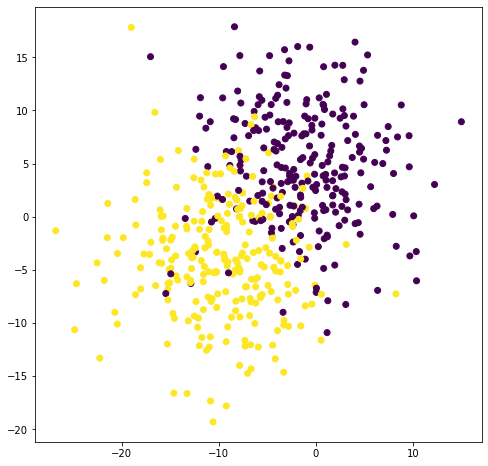

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

C:\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


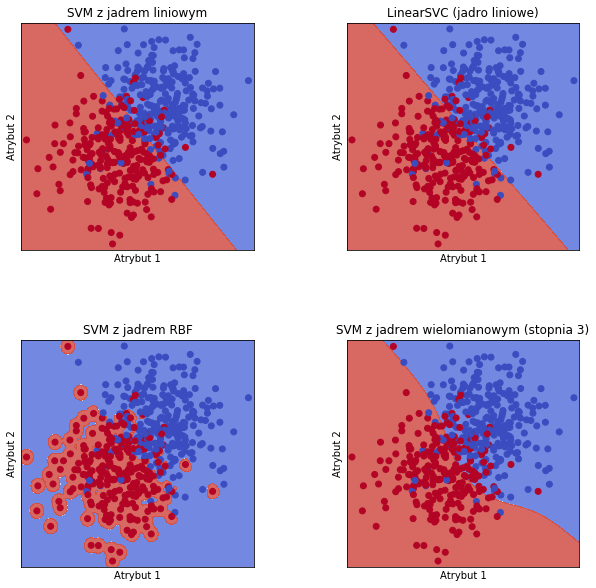

In [4]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**Dzielę na dane treningowe i testowe**

In [48]:
X3_train, X3_test, y3_train, y3_test = train_test_split(dane3[cechy], dane3['label'], test_size=0.2, random_state=1)

In [5]:
from sklearn.metrics import roc_curve, auc

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

Dla współczynnika C = 0.01, ROC area to 0.9412
Dla współczynnika C = 0.1, ROC area to 0.9412
Dla współczynnika C = 1, ROC area to 0.9412
Dla współczynnika C = 10, ROC area to 0.9412
Dla współczynnika C = 100, ROC area to 0.9412
Dla współczynnika C = 1000, ROC area to 0.9412


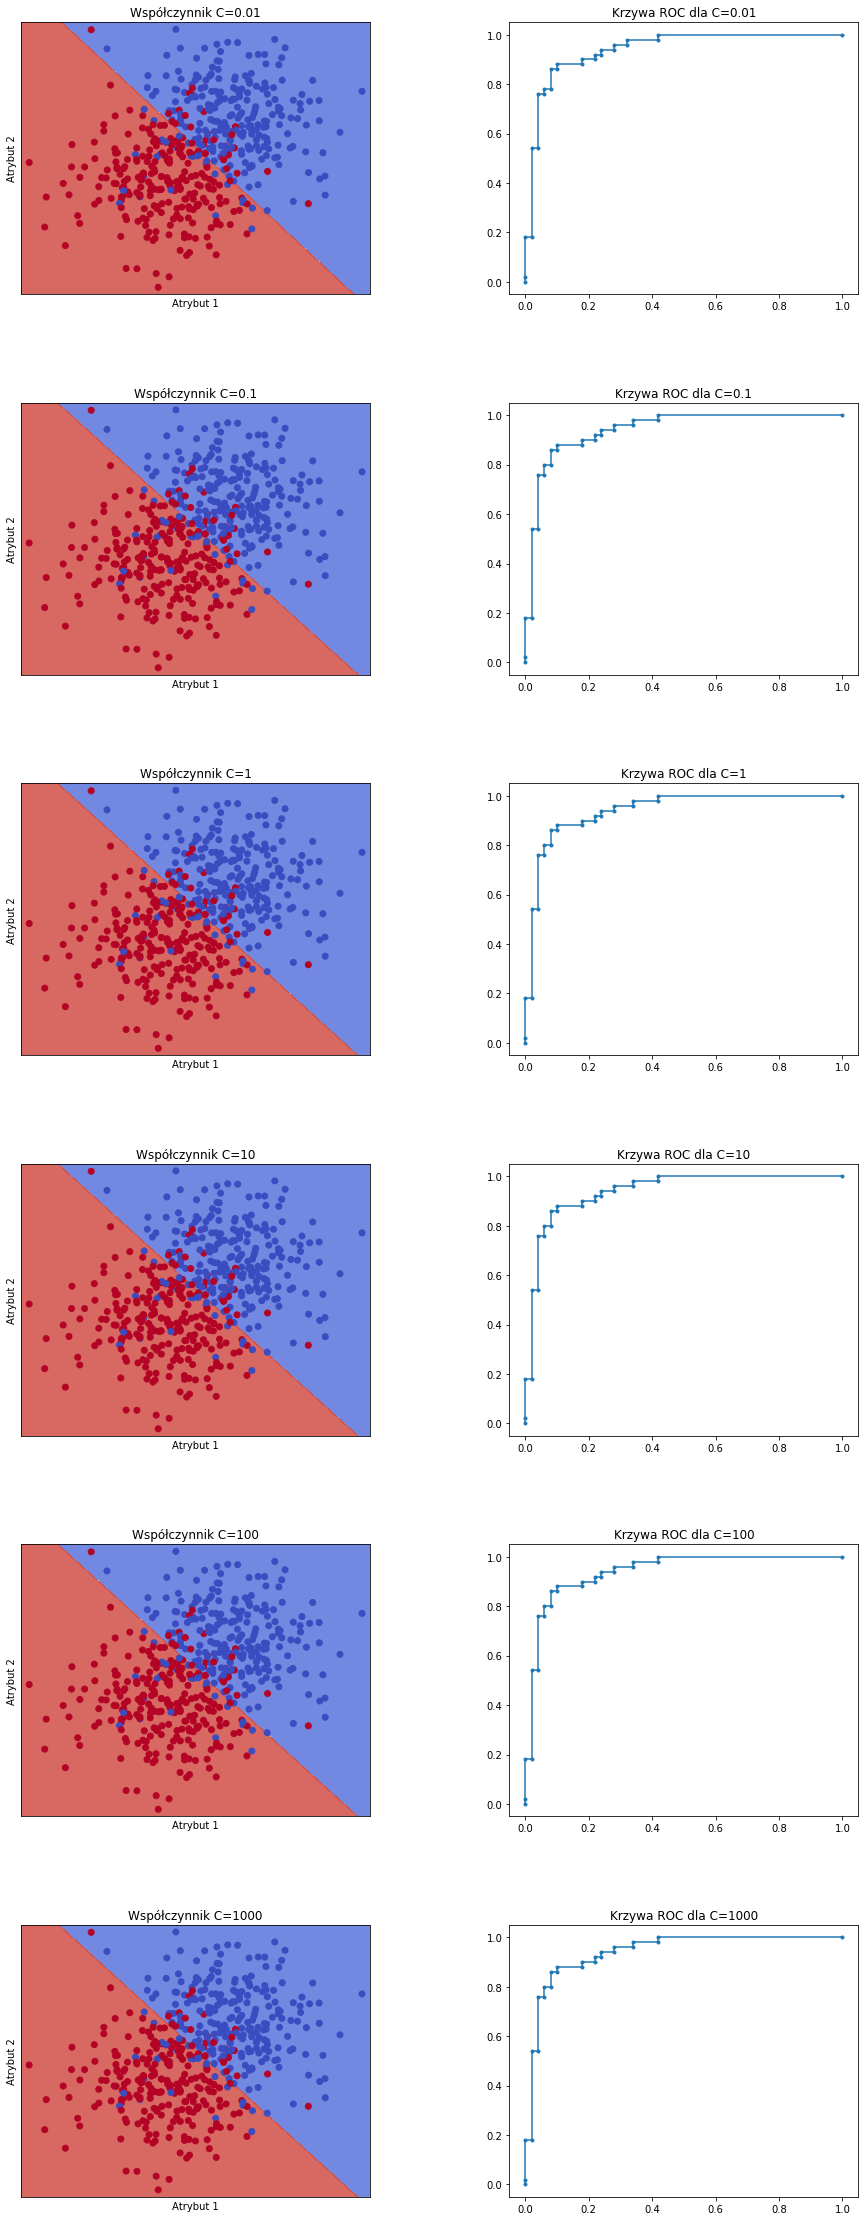

In [50]:
c_array = [0.01, 0.1, 1, 10, 100, 1000]

x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
plt.figure(figsize = (15, 40))
for i, j in enumerate(c_array):
    svc = svm.SVC(kernel='linear', C=j).fit(X3_train, y3_train)
    plt.subplot(6, 2, 2*i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_roc = svc.decision_function(X3_test)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Współczynnik C={j}")
    
    plt.subplot(6, 2, 2*i+2)
    fp, tp, _ = roc_curve(y3_test, Z_roc)
    roc_auc = auc(fp, tp)
    plt.plot(fp, tp, marker='.', label='ROC curve (area = %0.2f)' % roc_auc)
    print(f"Dla współczynnika C = {j}, ROC area to %0.4f" % roc_auc)
    plt.title(f"Krzywa ROC dla C={j}")

**Analizując powyższe wyniki, te same wartości AUC otrzymaliśmy dla wszystkich wybranych współczynników C, te same efekty klasyfikacji otrzymujemy dla wszystkich wskazanych do przetestowania współczynników.**

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

Dla współczynnika C = 0.01, ROC area to 0.93960
Dla współczynnika C = 0.1, ROC area to 0.94080
Dla współczynnika C = 1, ROC area to 0.94000
Dla współczynnika C = 10, ROC area to 0.93280
Dla współczynnika C = 100, ROC area to 0.93560
Dla współczynnika C = 1000, ROC area to 0.93640


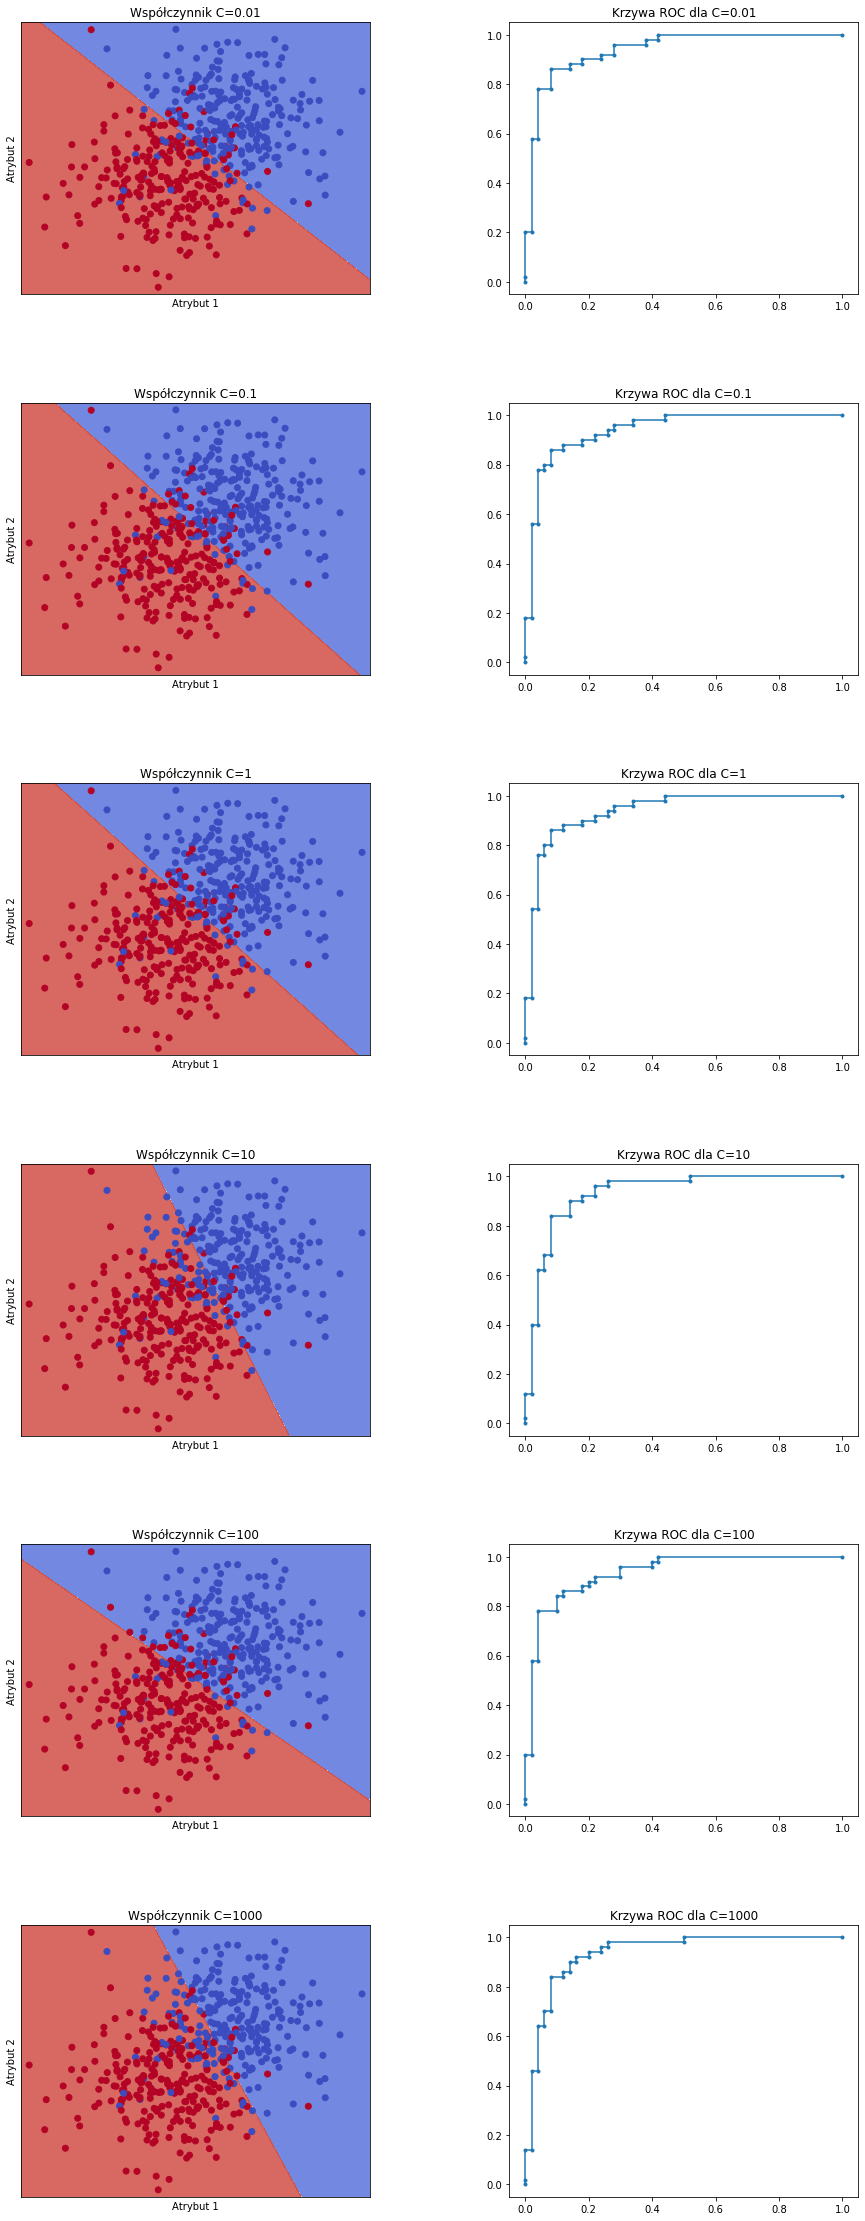

In [20]:
import warnings
warnings.filterwarnings("ignore")
c_array = [0.01, 0.1, 1, 10, 100, 1000]

x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
plt.figure(figsize = (15, 40))
for i, j in enumerate(c_array):
    svc = svm.LinearSVC(C=j).fit(X3_train, y3_train)
    plt.subplot(6, 2, 2*i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_roc = svc.decision_function(X3_test)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Współczynnik C={j}")
    
    plt.subplot(6, 2, 2*i+2)
    fp, tp, _ = roc_curve(y3_test, Z_roc)
    roc_auc = auc(fp, tp)
    plt.plot(fp, tp, marker='.', label='ROC curve (area = %0.2f)' % roc_auc)
    print(f"Dla współczynnika C = {j}, ROC area to %0.5f" % roc_auc)
    plt.title(f"Krzywa ROC dla C={j}")

**Dla LinearSVC najlepszy współczynnik C to 0.1 (ROC area jest wtedy największa, wynosi 0.94080)**

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

Dla współczynnika C = 0.1 oraz stopnia wielomianu 2, ROC area to 0.82000
Dla współczynnika C = 0.1 oraz stopnia wielomianu 3, ROC area to 0.93640
Dla współczynnika C = 0.1 oraz stopnia wielomianu 4, ROC area to 0.82000
Dla współczynnika C = 0.1 oraz stopnia wielomianu 5, ROC area to 0.93400
Dla współczynnika C = 0.1 oraz stopnia wielomianu 6, ROC area to 0.81000
Dla współczynnika C = 0.1 oraz stopnia wielomianu 7, ROC area to 0.91920
Dla współczynnika C = 0.1 oraz stopnia wielomianu 8, ROC area to 0.83760
Dla współczynnika C = 0.1 oraz stopnia wielomianu 9, ROC area to 0.93520


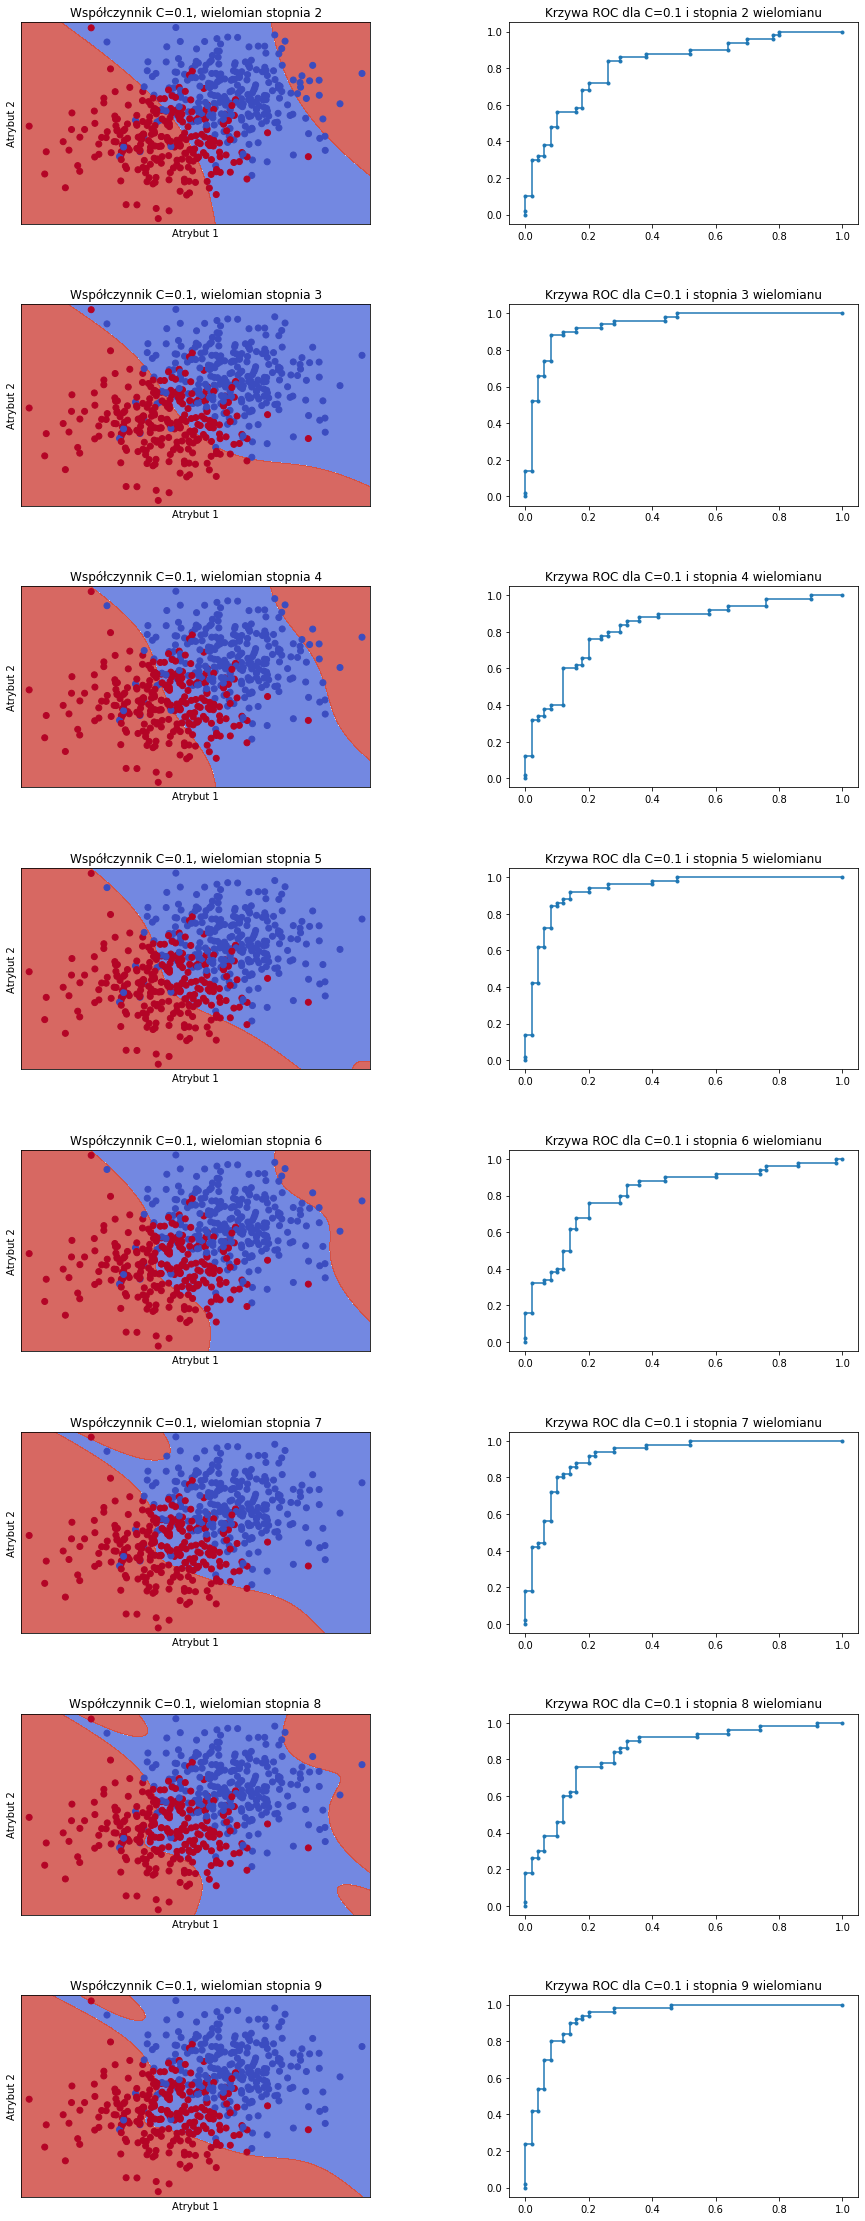

Dla współczynnika C = 1 oraz stopnia wielomianu 2, ROC area to 0.82400
Dla współczynnika C = 1 oraz stopnia wielomianu 3, ROC area to 0.93640
Dla współczynnika C = 1 oraz stopnia wielomianu 4, ROC area to 0.82400
Dla współczynnika C = 1 oraz stopnia wielomianu 5, ROC area to 0.93640
Dla współczynnika C = 1 oraz stopnia wielomianu 6, ROC area to 0.82280
Dla współczynnika C = 1 oraz stopnia wielomianu 7, ROC area to 0.93920
Dla współczynnika C = 1 oraz stopnia wielomianu 8, ROC area to 0.81480
Dla współczynnika C = 1 oraz stopnia wielomianu 9, ROC area to 0.93360


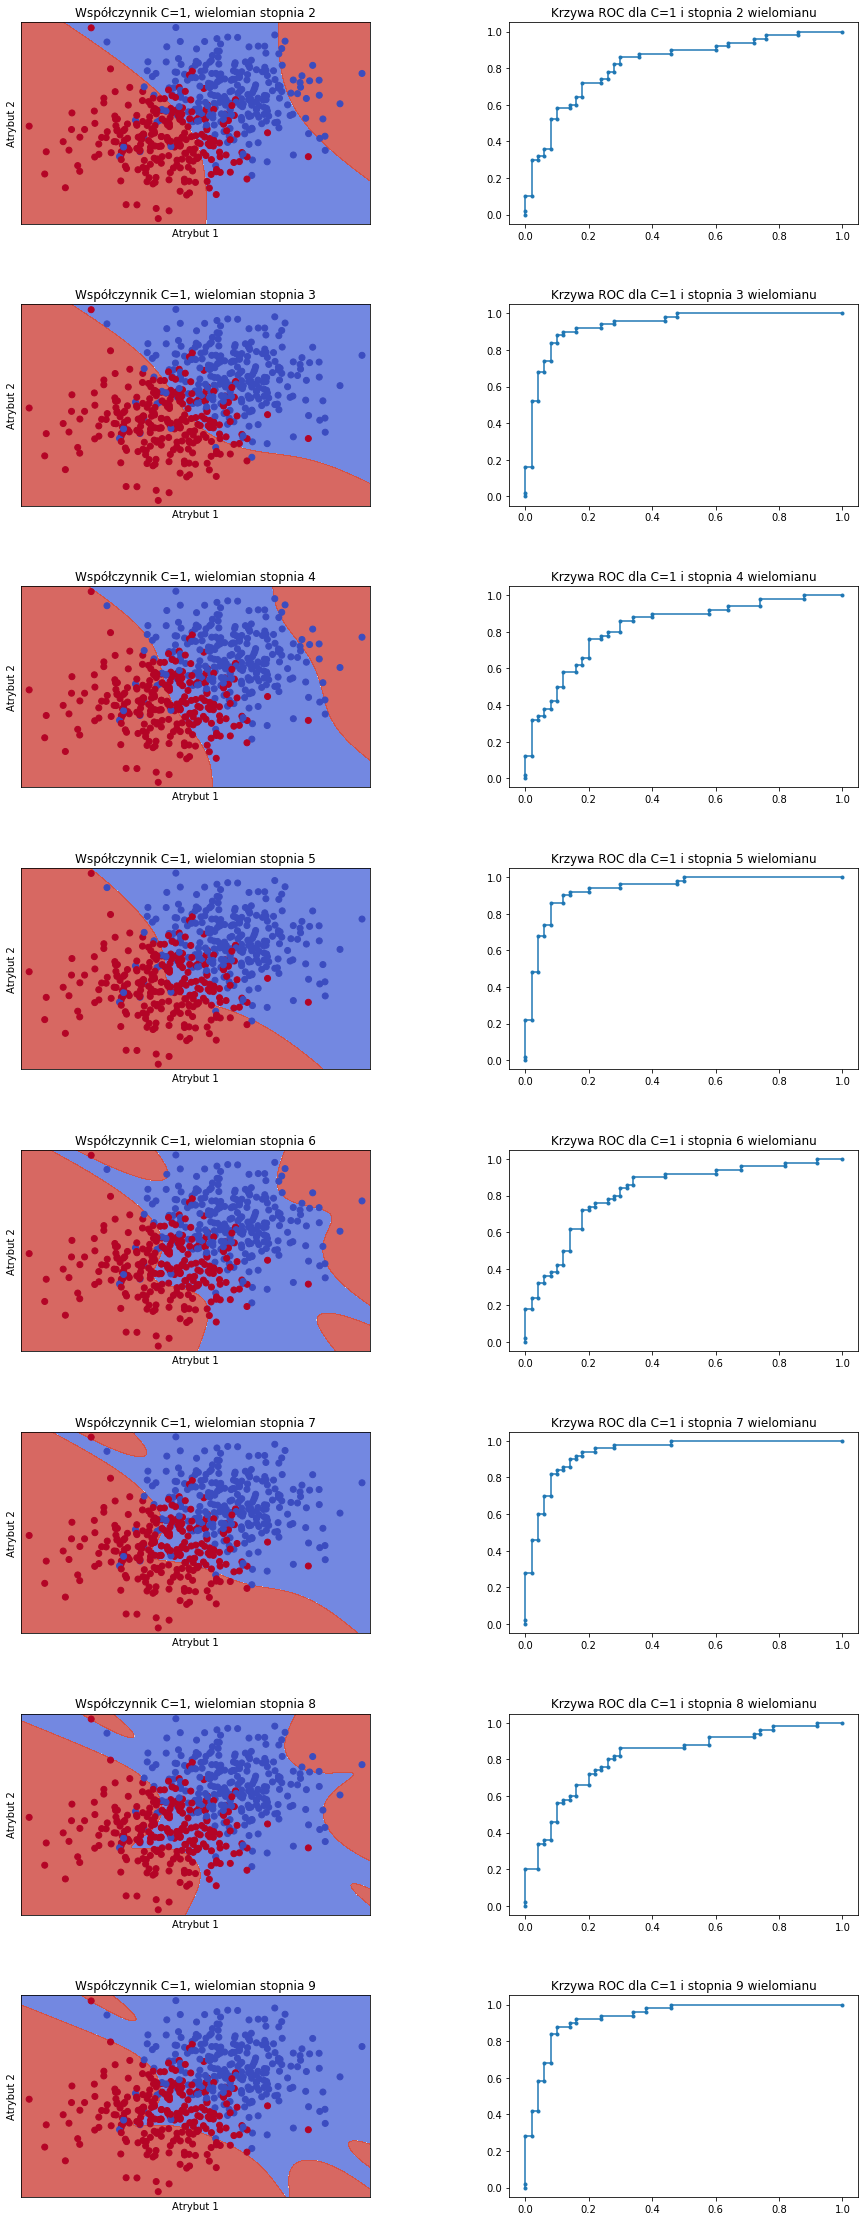

Dla współczynnika C = 10 oraz stopnia wielomianu 2, ROC area to 0.82440
Dla współczynnika C = 10 oraz stopnia wielomianu 3, ROC area to 0.93760
Dla współczynnika C = 10 oraz stopnia wielomianu 4, ROC area to 0.82360
Dla współczynnika C = 10 oraz stopnia wielomianu 5, ROC area to 0.93880
Dla współczynnika C = 10 oraz stopnia wielomianu 6, ROC area to 0.83120
Dla współczynnika C = 10 oraz stopnia wielomianu 7, ROC area to 0.93640
Dla współczynnika C = 10 oraz stopnia wielomianu 8, ROC area to 0.81600
Dla współczynnika C = 10 oraz stopnia wielomianu 9, ROC area to 0.93800


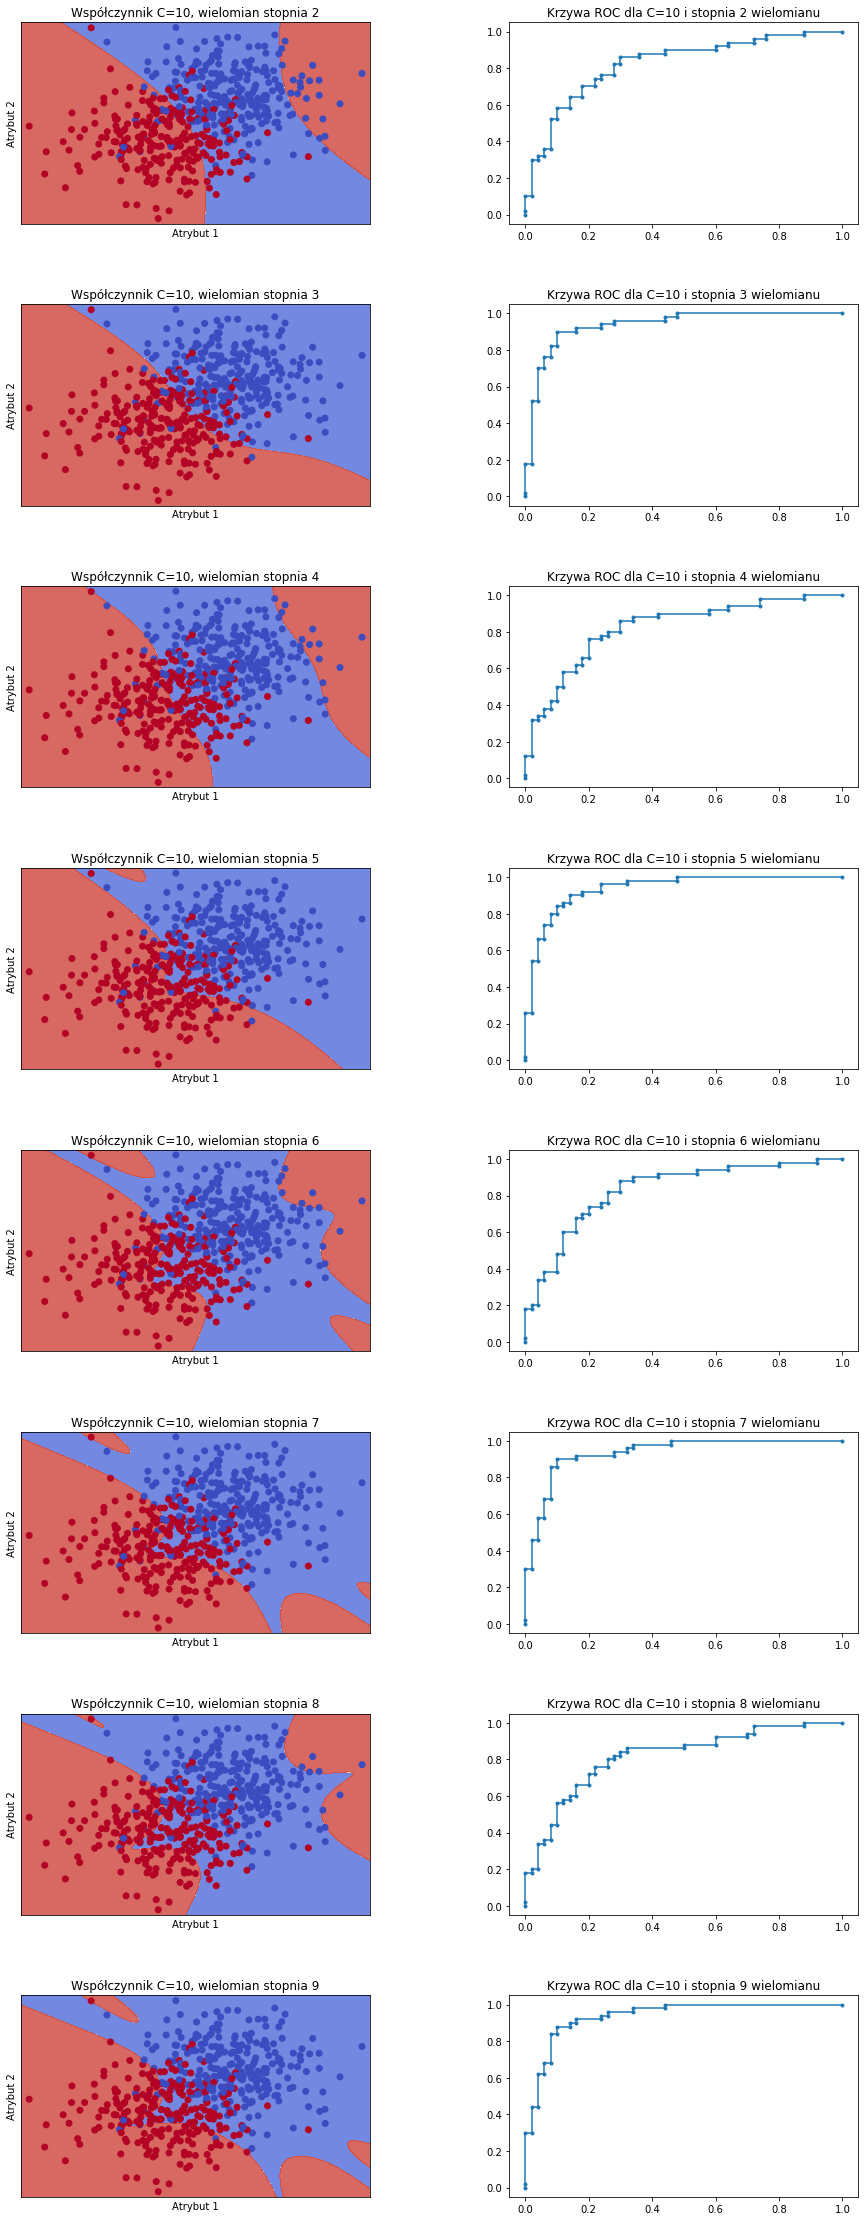

Dla współczynnika C = 100 oraz stopnia wielomianu 2, ROC area to 0.82440
Dla współczynnika C = 100 oraz stopnia wielomianu 3, ROC area to 0.93720
Dla współczynnika C = 100 oraz stopnia wielomianu 4, ROC area to 0.82360
Dla współczynnika C = 100 oraz stopnia wielomianu 5, ROC area to 0.93840
Dla współczynnika C = 100 oraz stopnia wielomianu 6, ROC area to 0.83120
Dla współczynnika C = 100 oraz stopnia wielomianu 7, ROC area to 0.93600
Dla współczynnika C = 100 oraz stopnia wielomianu 8, ROC area to 0.81640
Dla współczynnika C = 100 oraz stopnia wielomianu 9, ROC area to 0.93480


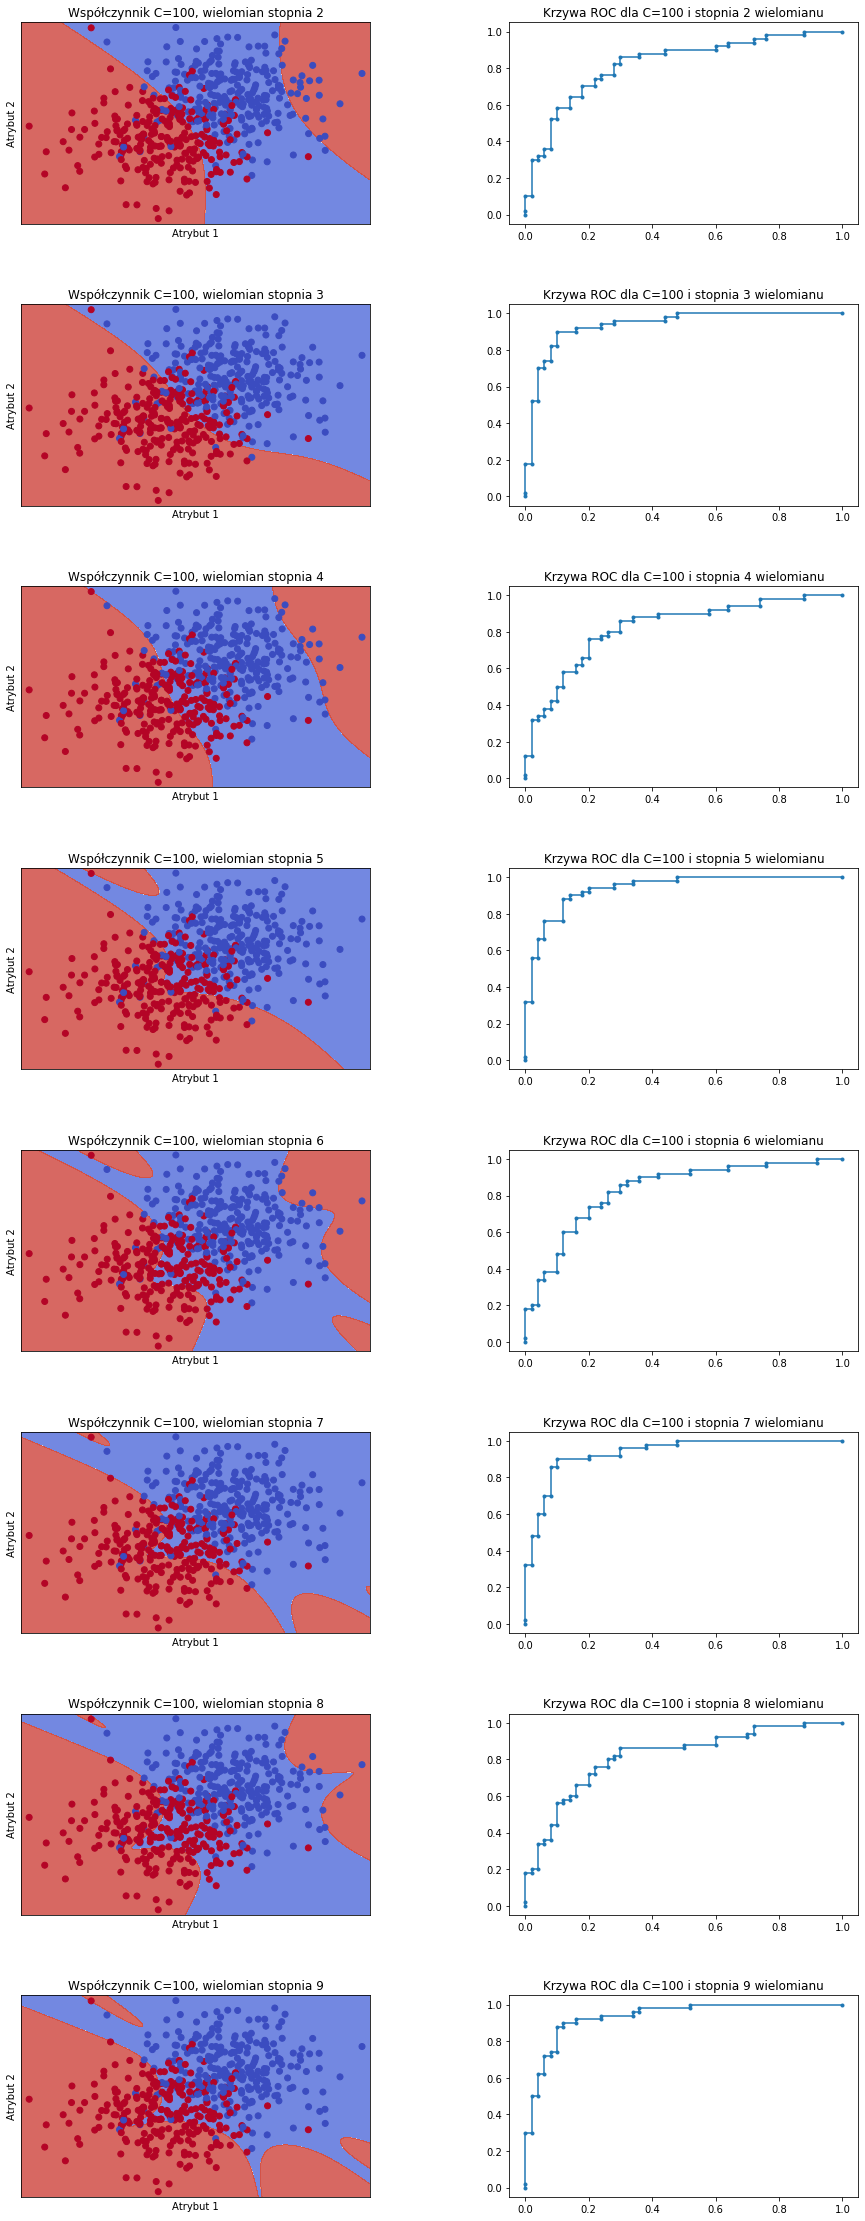

Dla współczynnika C = 1000 oraz stopnia wielomianu 2, ROC area to 0.82440
Dla współczynnika C = 1000 oraz stopnia wielomianu 3, ROC area to 0.93720
Dla współczynnika C = 1000 oraz stopnia wielomianu 4, ROC area to 0.82360
Dla współczynnika C = 1000 oraz stopnia wielomianu 5, ROC area to 0.93840
Dla współczynnika C = 1000 oraz stopnia wielomianu 6, ROC area to 0.82120
Dla współczynnika C = 1000 oraz stopnia wielomianu 7, ROC area to 0.93640
Dla współczynnika C = 1000 oraz stopnia wielomianu 8, ROC area to 0.82400
Dla współczynnika C = 1000 oraz stopnia wielomianu 9, ROC area to 0.93160


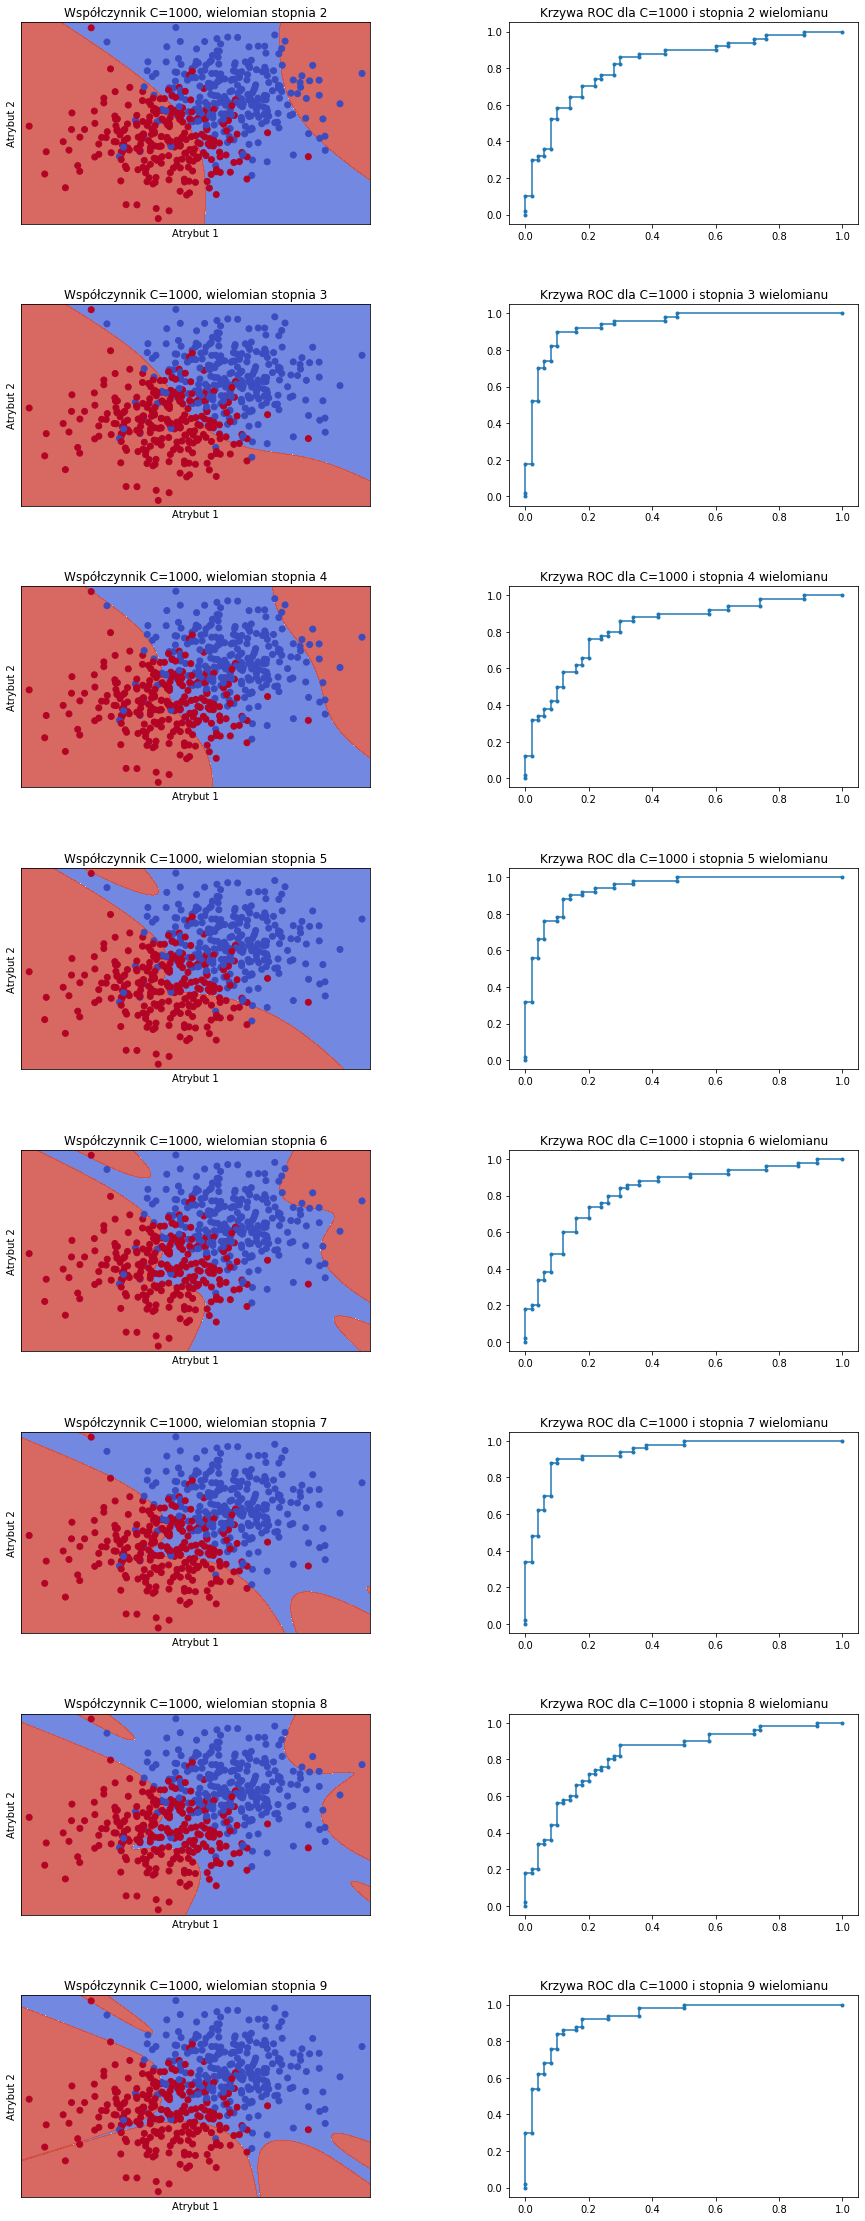

In [51]:
#Wybieram współczynniki do testów
c_array = [0.1, 1, 10, 100, 1000]
#Wybieram stopnie wielomianu do testów
poly_degrees = range(2,10)

#Efektem są pary wykresów -- pokazujących granice decyzyjne i krzywą ROC dla określonego współczynnika i stopnia wielomianu

x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    

for j in c_array:
    plt.figure(figsize = (15, 40))
    for i, k in enumerate(poly_degrees):
        svc = svm.SVC(kernel='poly', degree=k, C=j).fit(X3_train, y3_train)
        plt.subplot(8, 2, 2*i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_roc = svc.decision_function(X3_test)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
        plt.xlabel('Atrybut 1')
        plt.ylabel('Atrybut 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(f"Współczynnik C={j}, wielomian stopnia {k}")

        plt.subplot(8, 2, 2*i+2)
        fp, tp, _ = roc_curve(y3_test, Z_roc)
        roc_auc = auc(fp, tp)
        plt.plot(fp, tp, marker='.', label='ROC curve (area = %0.2f)' % roc_auc)
        print(f"Dla współczynnika C = {j} oraz stopnia wielomianu {k}, ROC area to %0.5f" % roc_auc)
        plt.title(f"Krzywa ROC dla C={j} i stopnia {k} wielomianu")
    plt.show()

**Analizując powyższe wyniki można dojść do wniosku, że najlepszy efekt (największe AUC=0.93920) można uzyskać dla stopnia wielomianu 7 i współczynnika C=1. Co warte zauważenia i zaznaczenia, wielomiany stopni parzystych dawały widocznie gorsze rezultaty niż te stopni nieparzystych.**

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

Dla współczynnika gamma = 0.0001, ROC area to 0.94040
Dla współczynnika gamma = 0.001, ROC area to 0.93960
Dla współczynnika gamma = 0.01, ROC area to 0.92680
Dla współczynnika gamma = 0.1, ROC area to 0.86760
Dla współczynnika gamma = 1, ROC area to 0.83920
Dla współczynnika gamma = 10, ROC area to 0.75560


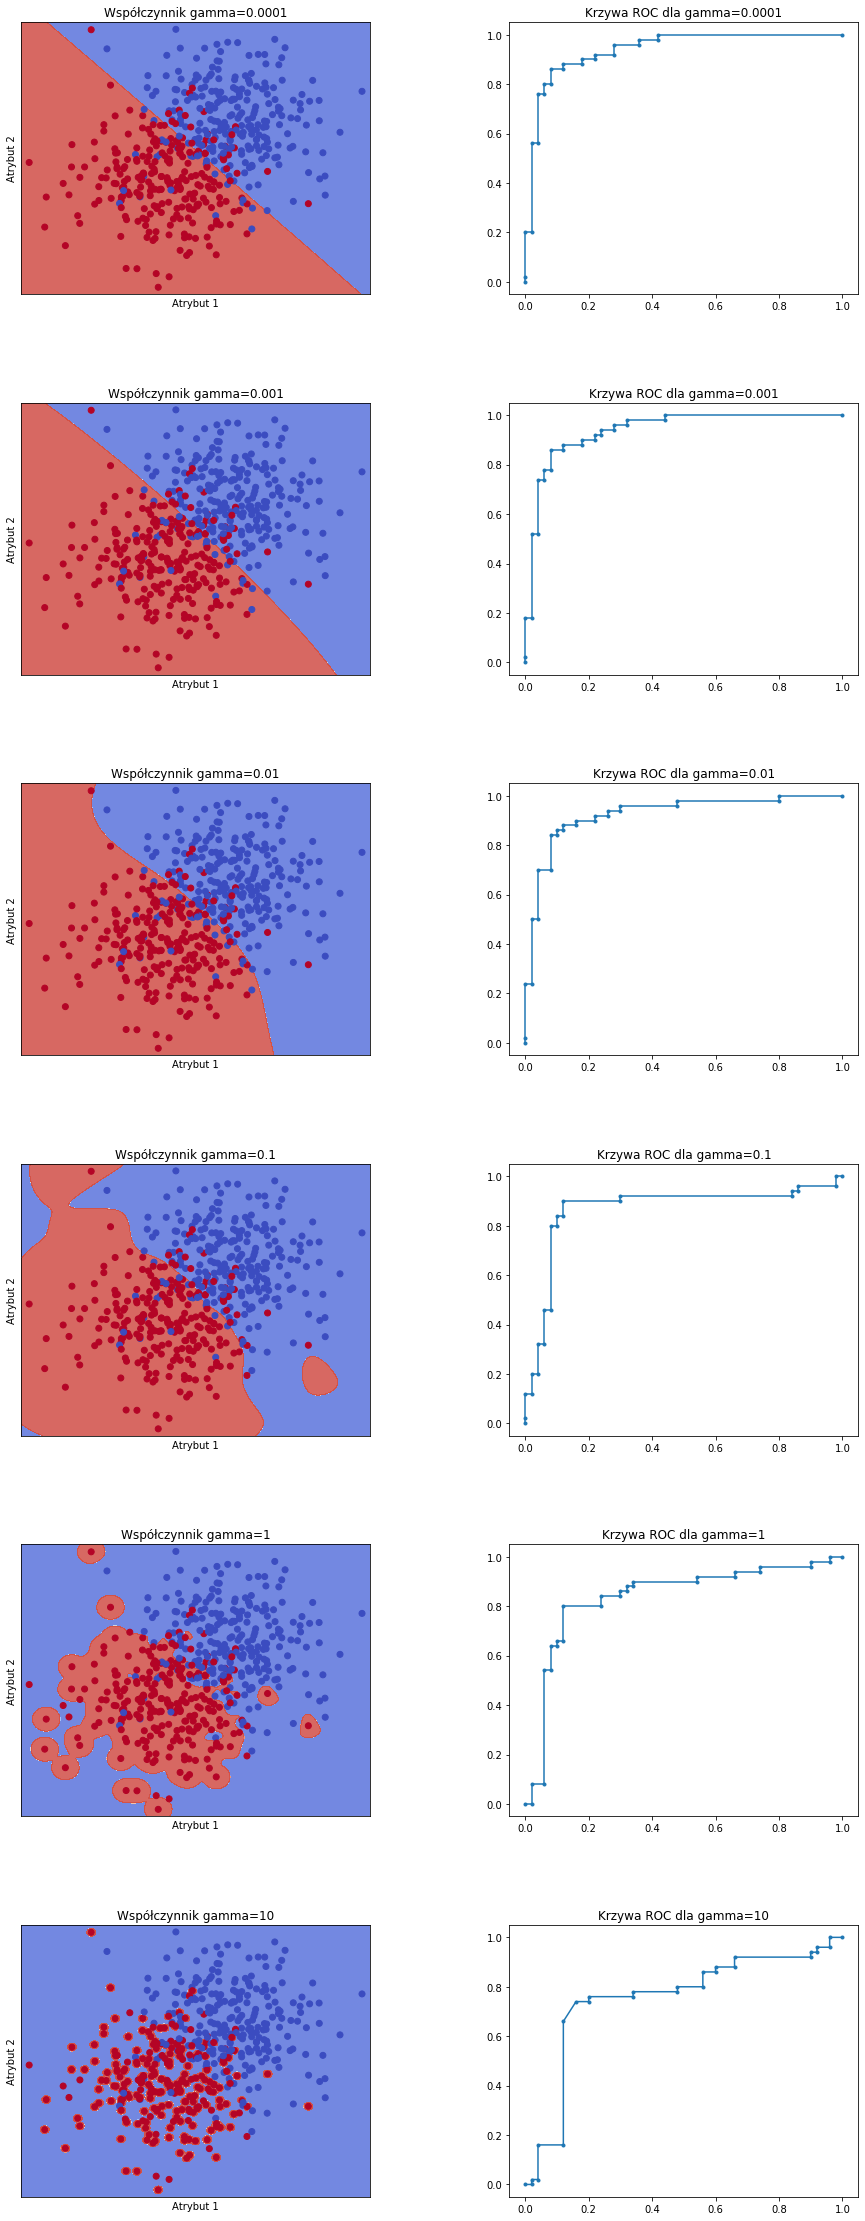

In [23]:
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]

x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
plt.figure(figsize = (15, 40))
for i, j in enumerate(gammas):
    svc = svm.SVC(kernel='rbf', gamma=j).fit(X3_train, y3_train)
    plt.subplot(6, 2, 2*i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_roc = svc.decision_function(X3_test)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Współczynnik gamma={j}")
    
    plt.subplot(6, 2, 2*i+2)
    fp, tp, _ = roc_curve(y3_test, Z_roc)
    roc_auc = auc(fp, tp)
    plt.plot(fp, tp, marker='.', label='ROC curve (area = %0.2f)' % roc_auc)
    print(f"Dla współczynnika gamma = {j}, ROC area to %0.5f" % roc_auc)
    plt.title(f"Krzywa ROC dla gamma={j}")

**W tym przypadku możemy zaobserwować, że im mniejszy współczynnik, tym lepszy wynik możemy otrzymać. Dla testowanych przeze mnie współczynników, najlepiej zaprezentował się najmniejszy z nich, czyli 0.0001 (AUC=0.94040), co pozwala spodziewać się jeszcze lepszych wyników dla mniejszych współczynników.**